# Library Imports and Paths

In [4]:
'''Importing the modules needed for the analysis... the core is th IDAT_Processor module 
   containing most of the needed functions and classes for the analysis'''
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="1"
import sys
sys.path.append("../../Keras_utils/")
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from clr_callback import CyclicLR
from keras_lr_finder import LRFinder
import imblearn
import pandas as pd
import os
#import methylprep
#import methQC
import methylcheck
import glob
import numpy as np
from pymethylprocess.meffil_functions import r_autosomal_cpgs, remove_sex
from pymethylprocess.PreProcessDataTypes import PreProcessIDAT
from pymethylprocess.visualizations import umap_embed, plotly_plot, plot_heatmap, plot_cell_type_results, transform_plot
from pymethylprocess.PreProcessDataTypes import PreProcessPhenoData

from pymethylprocess.utils import remove_sex, remove_snps, est_age
from pymethylprocess.MethylationDataTypes import MethylationArray, ImputerObject
from pymethylprocess.preprocess import meffil_encode
import importlib
import numpy as np
from rpy2.robjects import pandas2ri, numpy2ri
import rpy2.robjects as robjects
import matplotlib.pyplot as plt
import seaborn as sns
from pymethylprocess.general_machine_learning import MachineLearning
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import RandomOverSampler
from keras.utils import to_categorical
np.__version__

'1.19.1'

# Data imports

In [5]:
####Methylation specific values
to_load='pmg_mvals_108.csv'
mval_10000=pd.read_csv(to_load, index_col=0)

In [6]:
mval_10000

,Control - NCx.202818860053_R04C01,Control - NCx.202818860053_R06C01,Control - NCx.202818860053_R08C01,Control - NCx.202931510124_R04C01,Control - NCx.202931510124_R06C01,Control - NCx.202931510124_R08C01,Control - WM.202818860053_R05C01,Control - WM.202931510124_R01C01,Control - WM.202931510124_R05C01,Control - WM.202931510124_R07C01,...,TLE/CTRL.202148010053_R06C01,TLE/CTRL.202148010053_R07C01,TLE/CTRL.202148010058_R01C01,TLE/CTRL.202148010058_R04C01,TLE/CTRL.202148010058_R07C01,TLE/CTRL.202148010059_R01C01,TLE/CTRL.202148010059_R03C01,TLE/CTRL.202148010059_R04C01,TLE/CTRL.202148010058_R05C01,TLE/CTRL.202148010058_R08C01
cg26598162,1.374303,0.180667,0.930629,-0.099189,0.048901,0.964125,-2.763860,-2.565872,-2.025732,-1.934633,...,-0.533896,-0.324934,-0.594181,-0.196400,-0.532272,0.075717,0.019932,-0.436880,-0.065458,-0.902012
cg12402033,2.506152,1.202770,0.512664,0.213288,0.735307,1.458339,-2.290480,-2.222458,-2.436876,-2.195650,...,-0.298654,-0.244938,-0.582120,0.322183,0.364116,0.745321,0.304301,0.661921,-0.160577,-0.046681
cg12762413,0.932483,0.129039,-0.170453,-0.032383,0.434884,0.343276,-2.497915,-1.451357,-2.370896,-0.798856,...,-0.370812,-0.739836,-0.211892,0.015837,0.129457,0.386860,0.574269,0.257235,0.286345,-0.145643
cg07201717,1.891643,1.604590,1.203534,0.299127,0.443492,-0.132103,-1.338410,-0.940906,-2.271607,-1.109026,...,-0.495756,-0.914839,-0.769574,-0.144740,-0.142727,-0.067930,-0.441130,-0.688225,-0.693213,-0.165277
cg05011265,0.892072,0.740168,1.605844,1.389072,1.552278,1.485475,0.262139,0.818971,1.179483,1.585163,...,0.850652,1.017647,0.976659,0.837840,0.594253,0.885472,1.191213,0.965003,0.792592,0.918515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cg10220060,0.073770,0.541042,0.312562,0.417180,0.694751,0.397837,0.811807,0.503273,0.517789,0.865611,...,-0.765576,-0.739491,-0.751886,-0.769525,-0.451381,-0.979563,-0.826437,-0.706468,-0.515323,-0.759104
cg23973972,-0.713541,-0.774990,-0.630949,-0.831493,-0.665605,-0.351418,-0.693818,-0.317839,-0.453586,-0.461045,...,-1.643735,-1.742568,-2.064518,-1.686303,-1.703393,-2.072642,-1.567475,-1.700343,-1.798180,-1.808978
cg25728699,1.424166,1.777265,1.842929,3.062578,2.320851,1.694322,1.343464,2.042106,1.902923,2.534080,...,0.446323,0.679733,0.533519,0.592161,0.732376,0.857429,1.507910,1.301913,0.733253,0.331025
cg13441753,1.539687,1.660640,1.482741,2.477711,2.576968,2.298189,0.622039,1.525817,2.197570,2.400080,...,0.531659,0.124178,1.286082,1.247489,0.678366,1.418990,1.704642,1.660995,0.825121,-0.080288


In [7]:
sorter=mval_10000.var(axis=1).sort_values(ascending=False)[:10000];sorter
var_df=mval_10000.reindex(sorter.index).transpose();var_df

,cg12652796,cg15710109,cg03609847,cg12379383,cg12566844,cg13441753,cg00612595,cg10114725,cg14548128,cg26424013,...,cg10139443,cg12079797,cg02887652,cg07008591,cg05011265,cg02475600,cg08485302,cg27132553,cg11001495,cg16123421
Control - NCx.202818860053_R04C01,0.071678,0.337082,-0.070447,-0.545601,2.039649,1.539687,-4.217354,1.118898,-1.247488,-2.232835,...,-2.445434,-0.285874,0.719827,-0.647382,0.892072,2.220990,0.058487,0.773340,1.050898,2.136722
Control - NCx.202818860053_R06C01,-0.432744,-0.842043,0.220684,-1.100151,1.701224,1.660640,-4.070318,0.908739,-1.207748,-1.613831,...,-2.721678,0.147420,0.940750,-0.512212,0.740168,2.762833,-0.083242,0.904676,0.219512,2.362049
Control - NCx.202818860053_R08C01,2.772735,-0.480888,1.037871,-1.286285,1.180404,1.482741,-4.083360,0.617179,-0.380926,-1.829415,...,-2.933926,-0.245462,1.771539,-0.478268,1.605844,3.165353,0.252861,0.235326,-0.278319,2.113012
Control - NCx.202931510124_R04C01,-1.427618,1.205030,1.063518,1.150052,1.398028,2.477711,-3.693184,-0.056458,-1.683237,-3.086386,...,-2.792821,-0.196773,0.438058,-0.468996,1.389072,2.636918,0.081156,0.786127,0.811701,2.722442
Control - NCx.202931510124_R06C01,-0.880655,0.256117,1.547479,-0.422802,1.447343,2.576968,-3.211817,0.654323,-1.701579,-2.703808,...,-2.668584,-0.254369,0.952174,-0.211129,1.552278,2.756252,0.168315,0.958629,0.939778,2.822667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TLE/CTRL.202148010059_R01C01,-1.813900,0.493895,-0.076881,0.887734,1.220504,1.418990,-5.067026,0.960443,-2.360776,-4.449718,...,-2.645835,-0.376666,1.463665,-1.033983,0.885472,2.217593,-0.098733,0.682154,1.229649,2.105862
TLE/CTRL.202148010059_R03C01,-2.068424,0.349766,0.436190,0.729492,0.984160,1.704642,-4.287251,0.839204,-2.624403,-4.703412,...,-2.780776,-0.749517,1.936542,-1.114146,1.191213,2.533779,-0.180284,0.811643,1.335795,2.319045
TLE/CTRL.202148010059_R04C01,-2.073125,0.656576,0.441864,0.793432,-0.115142,1.660995,-3.334577,0.206813,-2.370913,-4.787122,...,-3.046415,-0.694919,1.776716,-0.794094,0.965003,1.730263,0.020400,0.352289,1.266436,2.065419
TLE/CTRL.202148010058_R05C01,-1.734717,1.005669,0.072625,1.240169,0.876450,0.825121,-2.596851,1.352743,-2.647922,-4.836594,...,-3.088574,-0.566552,1.234978,-1.226050,0.792592,2.267571,-0.107460,0.567421,1.362675,1.819018


In [17]:
### Phenotype information ###
to_load='pmg_pheno.csv'

sub_pheno_py=pd.read_csv(to_load, index_col=0)


In [18]:
sub_pheno_py

,age_onset,age_surgery,Basename,Batchnum,disease_diagnosis,duration,duration_group,duration_group_cat,short_diagnosis,long_diagnosis,...,DNA_region_extraction_verified,disease,identifier,ID,filenames,xMed,yMed,predictedSex,Glia,Neurons
0,0.0,11.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202818860053,Control - NCx,0.0,0,0,Control - NCx,Control - NCx,...,ja,Control - NCx,202818860053_R04C01,Control - NCx.202818860053_R04C01,/home/Deep_Learner/private/Methyl_Array/Katja_...,10.951649,9.266787,M,0.664275,0.623434
1,0.0,27.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202818860053,Control - NCx,0.0,0,0,Control - NCx,Control - NCx,...,ja,Control - NCx,202818860053_R06C01,Control - NCx.202818860053_R06C01,/home/Deep_Learner/private/Methyl_Array/Katja_...,9.924070,10.583083,M,0.689274,0.603537
2,0.0,27.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202818860053,Control - NCx,0.0,0,0,Control - NCx,Control - NCx,...,ja,Control - NCx,202818860053_R08C01,Control - NCx.202818860053_R08C01,/home/Deep_Learner/private/Methyl_Array/Katja_...,9.791163,10.468624,M,0.651649,0.657323
3,0.0,13.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202931510124,Control - NCx,0.0,0,0,Control - NCx,Control - NCx,...,ja,Control - NCx,202931510124_R04C01,Control - NCx.202931510124_R04C01,/home/Deep_Learner/private/Methyl_Array/Katja_...,11.602235,9.108524,F,0.696840,0.539316
4,0.0,49.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202931510124,Control - NCx,0.0,0,0,Control - NCx,Control - NCx,...,ja,Control - NCx,202931510124_R06C01,Control - NCx.202931510124_R06C01,/home/Deep_Learner/private/Methyl_Array/Katja_...,11.856426,9.252665,F,0.687305,0.579894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,15.0,40.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202148010059,TLE/CTRL,25.0,21-50,4,TLE/CTRL,TLE/CTRL DNA Bethel,...,ja,TLE/CTRL,202148010059_R01C01,TLE/CTRL.202148010059_R01C01,/home/Deep_Learner/private/Methyl_Array/Katja_...,12.578726,13.149271,M,0.631989,0.579096
121,5.0,33.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202148010059,TLE/CTRL,28.0,21-50,4,TLE/CTRL,TLE/CTRL DNA Bethel,...,ja,TLE/CTRL,202148010059_R03C01,TLE/CTRL.202148010059_R03C01,/home/Deep_Learner/private/Methyl_Array/Katja_...,13.434368,11.002112,F,0.677859,0.537322
122,1.0,48.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202148010059,TLE/CTRL,47.0,21-50,4,TLE/CTRL,TLE/CTRL DNA Bethel,...,ja,TLE/CTRL,202148010059_R04C01,TLE/CTRL.202148010059_R04C01,/home/Deep_Learner/private/Methyl_Array/Katja_...,12.732061,13.268542,M,0.714040,0.511480
123,1.0,55.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202148010058,TLE/CTRL,54.0,50-80,5,TLE/CTRL,TLE/CTRL DNA Bethel,...,ja,TLE/CTRL,202148010058_R05C01,TLE/CTRL.202148010058_R05C01,/home/Deep_Learner/private/Methyl_Array/Katja_...,12.288289,12.782998,M,0.690691,0.549854


In [19]:
sub_pheno_py=sub_pheno_py.sort_values(by=['ID'])

In [20]:
sub_pheno_py

,age_onset,age_surgery,Basename,Batchnum,disease_diagnosis,duration,duration_group,duration_group_cat,short_diagnosis,long_diagnosis,...,DNA_region_extraction_verified,disease,identifier,ID,filenames,xMed,yMed,predictedSex,Glia,Neurons
0,0.0,11.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202818860053,Control - NCx,0.0,0,0,Control - NCx,Control - NCx,...,ja,Control - NCx,202818860053_R04C01,Control - NCx.202818860053_R04C01,/home/Deep_Learner/private/Methyl_Array/Katja_...,10.951649,9.266787,M,0.664275,0.623434
1,0.0,27.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202818860053,Control - NCx,0.0,0,0,Control - NCx,Control - NCx,...,ja,Control - NCx,202818860053_R06C01,Control - NCx.202818860053_R06C01,/home/Deep_Learner/private/Methyl_Array/Katja_...,9.924070,10.583083,M,0.689274,0.603537
2,0.0,27.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202818860053,Control - NCx,0.0,0,0,Control - NCx,Control - NCx,...,ja,Control - NCx,202818860053_R08C01,Control - NCx.202818860053_R08C01,/home/Deep_Learner/private/Methyl_Array/Katja_...,9.791163,10.468624,M,0.651649,0.657323
3,0.0,13.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202931510124,Control - NCx,0.0,0,0,Control - NCx,Control - NCx,...,ja,Control - NCx,202931510124_R04C01,Control - NCx.202931510124_R04C01,/home/Deep_Learner/private/Methyl_Array/Katja_...,11.602235,9.108524,F,0.696840,0.539316
4,0.0,49.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202931510124,Control - NCx,0.0,0,0,Control - NCx,Control - NCx,...,ja,Control - NCx,202931510124_R06C01,Control - NCx.202931510124_R06C01,/home/Deep_Learner/private/Methyl_Array/Katja_...,11.856426,9.252665,F,0.687305,0.579894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,5.0,68.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202148010058,TLE/CTRL,63.0,50-80,5,TLE/CTRL,TLE/CTRL DNA Bethel,...,ja,TLE/CTRL,202148010058_R08C01,TLE/CTRL.202148010058_R08C01,/home/Deep_Learner/private/Methyl_Array/Katja_...,12.641374,10.662668,M,0.688448,0.565077
120,15.0,40.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202148010059,TLE/CTRL,25.0,21-50,4,TLE/CTRL,TLE/CTRL DNA Bethel,...,ja,TLE/CTRL,202148010059_R01C01,TLE/CTRL.202148010059_R01C01,/home/Deep_Learner/private/Methyl_Array/Katja_...,12.578726,13.149271,M,0.631989,0.579096
110,16.0,26.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202148010059,TLE/CTRL,10.0,6-10,2,TLE/CTRL,TLE/CTRL DNA Bethel,...,ja,TLE/CTRL,202148010059_R02C01,TLE/CTRL.202148010059_R02C01,/home/Deep_Learner/private/Methyl_Array/Katja_...,12.710268,13.207319,M,0.679478,0.530720
121,5.0,33.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202148010059,TLE/CTRL,28.0,21-50,4,TLE/CTRL,TLE/CTRL DNA Bethel,...,ja,TLE/CTRL,202148010059_R03C01,TLE/CTRL.202148010059_R03C01,/home/Deep_Learner/private/Methyl_Array/Katja_...,13.434368,11.002112,F,0.677859,0.537322


In [21]:
sub_pheno_py=sub_pheno_py.set_index(['ID'])

In [22]:
sub_pheno_py

,age_onset,age_surgery,Basename,Batchnum,disease_diagnosis,duration,duration_group,duration_group_cat,short_diagnosis,long_diagnosis,...,case_ID,DNA_region_extraction_verified,disease,identifier,filenames,xMed,yMed,predictedSex,Glia,Neurons
ID,,,,,,,,,,,,,,,,,,,,,
Control - NCx.202818860053_R04C01,0.0,11.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202818860053,Control - NCx,0.0,0,0,Control - NCx,Control - NCx,...,SN 83/10 III,ja,Control - NCx,202818860053_R04C01,/home/Deep_Learner/private/Methyl_Array/Katja_...,10.951649,9.266787,M,0.664275,0.623434
Control - NCx.202818860053_R06C01,0.0,27.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202818860053,Control - NCx,0.0,0,0,Control - NCx,Control - NCx,...,SN 120/16 III,ja,Control - NCx,202818860053_R06C01,/home/Deep_Learner/private/Methyl_Array/Katja_...,9.924070,10.583083,M,0.689274,0.603537
Control - NCx.202818860053_R08C01,0.0,27.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202818860053,Control - NCx,0.0,0,0,Control - NCx,Control - NCx,...,SN 120/16 I,ja,Control - NCx,202818860053_R08C01,/home/Deep_Learner/private/Methyl_Array/Katja_...,9.791163,10.468624,M,0.651649,0.657323
Control - NCx.202931510124_R04C01,0.0,13.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202931510124,Control - NCx,0.0,0,0,Control - NCx,Control - NCx,...,SN 173/09 III,ja,Control - NCx,202931510124_R04C01,/home/Deep_Learner/private/Methyl_Array/Katja_...,11.602235,9.108524,F,0.696840,0.539316
Control - NCx.202931510124_R06C01,0.0,49.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202931510124,Control - NCx,0.0,0,0,Control - NCx,Control - NCx,...,SN 80/16 III,ja,Control - NCx,202931510124_R06C01,/home/Deep_Learner/private/Methyl_Array/Katja_...,11.856426,9.252665,F,0.687305,0.579894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TLE/CTRL.202148010058_R08C01,5.0,68.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202148010058,TLE/CTRL,63.0,50-80,5,TLE/CTRL,TLE/CTRL DNA Bethel,...,N878/15; 114/15 (Bielefeld),ja,TLE/CTRL,202148010058_R08C01,/home/Deep_Learner/private/Methyl_Array/Katja_...,12.641374,10.662668,M,0.688448,0.565077
TLE/CTRL.202148010059_R01C01,15.0,40.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202148010059,TLE/CTRL,25.0,21-50,4,TLE/CTRL,TLE/CTRL DNA Bethel,...,N1012/15; 133/15 (Bielefeld),ja,TLE/CTRL,202148010059_R01C01,/home/Deep_Learner/private/Methyl_Array/Katja_...,12.578726,13.149271,M,0.631989,0.579096
TLE/CTRL.202148010059_R02C01,16.0,26.0,/home/Deep_Learner/private/Methyl_Array/Katja_...,b202148010059,TLE/CTRL,10.0,6-10,2,TLE/CTRL,TLE/CTRL DNA Bethel,...,N1151/15; 149/15 (Bielefeld),ja,TLE/CTRL,202148010059_R02C01,/home/Deep_Learner/private/Methyl_Array/Katja_...,12.710268,13.207319,M,0.679478,0.530720


## Preparation of data

In [24]:
matrix=var_df;matrix

,cg12652796,cg15710109,cg03609847,cg12379383,cg12566844,cg13441753,cg00612595,cg10114725,cg14548128,cg26424013,...,cg10139443,cg12079797,cg02887652,cg07008591,cg05011265,cg02475600,cg08485302,cg27132553,cg11001495,cg16123421
Control - NCx.202818860053_R04C01,0.071678,0.337082,-0.070447,-0.545601,2.039649,1.539687,-4.217354,1.118898,-1.247488,-2.232835,...,-2.445434,-0.285874,0.719827,-0.647382,0.892072,2.220990,0.058487,0.773340,1.050898,2.136722
Control - NCx.202818860053_R06C01,-0.432744,-0.842043,0.220684,-1.100151,1.701224,1.660640,-4.070318,0.908739,-1.207748,-1.613831,...,-2.721678,0.147420,0.940750,-0.512212,0.740168,2.762833,-0.083242,0.904676,0.219512,2.362049
Control - NCx.202818860053_R08C01,2.772735,-0.480888,1.037871,-1.286285,1.180404,1.482741,-4.083360,0.617179,-0.380926,-1.829415,...,-2.933926,-0.245462,1.771539,-0.478268,1.605844,3.165353,0.252861,0.235326,-0.278319,2.113012
Control - NCx.202931510124_R04C01,-1.427618,1.205030,1.063518,1.150052,1.398028,2.477711,-3.693184,-0.056458,-1.683237,-3.086386,...,-2.792821,-0.196773,0.438058,-0.468996,1.389072,2.636918,0.081156,0.786127,0.811701,2.722442
Control - NCx.202931510124_R06C01,-0.880655,0.256117,1.547479,-0.422802,1.447343,2.576968,-3.211817,0.654323,-1.701579,-2.703808,...,-2.668584,-0.254369,0.952174,-0.211129,1.552278,2.756252,0.168315,0.958629,0.939778,2.822667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TLE/CTRL.202148010059_R01C01,-1.813900,0.493895,-0.076881,0.887734,1.220504,1.418990,-5.067026,0.960443,-2.360776,-4.449718,...,-2.645835,-0.376666,1.463665,-1.033983,0.885472,2.217593,-0.098733,0.682154,1.229649,2.105862
TLE/CTRL.202148010059_R03C01,-2.068424,0.349766,0.436190,0.729492,0.984160,1.704642,-4.287251,0.839204,-2.624403,-4.703412,...,-2.780776,-0.749517,1.936542,-1.114146,1.191213,2.533779,-0.180284,0.811643,1.335795,2.319045
TLE/CTRL.202148010059_R04C01,-2.073125,0.656576,0.441864,0.793432,-0.115142,1.660995,-3.334577,0.206813,-2.370913,-4.787122,...,-3.046415,-0.694919,1.776716,-0.794094,0.965003,1.730263,0.020400,0.352289,1.266436,2.065419
TLE/CTRL.202148010058_R05C01,-1.734717,1.005669,0.072625,1.240169,0.876450,0.825121,-2.596851,1.352743,-2.647922,-4.836594,...,-3.088574,-0.566552,1.234978,-1.226050,0.792592,2.267571,-0.107460,0.567421,1.362675,1.819018


In [25]:
matrix=matrix.loc[list(set(matrix.index.to_list()) &set(sub_pheno_py.index.to_list()) ) ];matrix

,cg12652796,cg15710109,cg03609847,cg12379383,cg12566844,cg13441753,cg00612595,cg10114725,cg14548128,cg26424013,...,cg10139443,cg12079797,cg02887652,cg07008591,cg05011265,cg02475600,cg08485302,cg27132553,cg11001495,cg16123421
TLE/CTRL.202148010058_R05C01,-1.734717,1.005669,0.072625,1.240169,0.876450,0.825121,-2.596851,1.352743,-2.647922,-4.836594,...,-3.088574,-0.566552,1.234978,-1.226050,0.792592,2.267571,-0.107460,0.567421,1.362675,1.819018
PMG.203219750116_R07C01,0.701222,-1.845544,2.090162,-0.180607,1.696090,3.053818,-4.973106,-0.226580,-0.896238,-4.981008,...,-3.005482,-0.377307,1.432154,-0.375027,1.216090,2.691596,0.204891,0.265979,0.907826,2.361222
FCD 2B.202831040056_R06C01,1.091568,-1.480250,0.985901,-1.149581,-0.631099,2.266541,-4.481177,-1.152685,-1.326178,-4.926339,...,-2.807239,0.051067,1.408635,-0.188416,0.867233,2.319783,-0.547351,-0.028448,1.235086,1.930230
HME.202827620174_R07C01,0.813419,-1.506114,2.321217,-1.771726,1.355390,3.178707,-4.786739,-0.024009,-0.080421,-4.453372,...,-2.456387,0.009355,0.835691,-0.199548,1.130582,2.753597,0.064201,0.196193,1.481012,2.238141
FCD 2B.202822930161_R06C01,-1.512554,-1.856451,2.920686,-0.968291,-1.385043,3.935288,-4.048350,-2.607171,-2.632988,-5.517400,...,-2.622104,0.854486,1.321467,0.519964,1.465320,2.445023,-0.276127,-0.297116,1.299558,2.189658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Control - WM.202931510124_R01C01,1.993296,-0.178439,0.196430,-2.372937,-1.004830,1.525817,-2.105783,-1.688394,0.015065,-2.552088,...,-3.471849,-0.038450,1.115896,-0.184307,0.818971,2.871506,-0.497035,0.132689,1.612935,2.342144
PMG.203219750116_R02C01,0.931055,-0.194267,0.158350,-1.646795,2.268561,2.021819,-3.632821,0.994803,-0.886509,-2.738419,...,-3.313642,-0.440683,1.493268,-0.664635,0.437711,1.607556,0.372828,0.653033,1.948300,2.568088
TLE/CTRL.202148010058_R08C01,-1.670613,0.565605,-0.463207,1.047973,0.519031,-0.080288,-4.152007,0.669261,-2.087451,-4.319086,...,-3.221113,-0.621626,1.355950,-1.058469,0.918515,2.563023,-0.415073,0.585206,1.206633,1.960688
PMG.203219750116_R06C01,0.585762,-1.619283,2.328144,-0.563746,1.444658,3.155522,-4.411110,0.131613,-1.188239,-5.916474,...,-3.233227,-0.320050,1.934557,-0.176309,1.799303,2.849798,0.513215,0.886101,1.369277,2.436453


In [26]:
matrix=matrix.sort_index();matrix

,cg12652796,cg15710109,cg03609847,cg12379383,cg12566844,cg13441753,cg00612595,cg10114725,cg14548128,cg26424013,...,cg10139443,cg12079797,cg02887652,cg07008591,cg05011265,cg02475600,cg08485302,cg27132553,cg11001495,cg16123421
Control - NCx.202818860053_R04C01,0.071678,0.337082,-0.070447,-0.545601,2.039649,1.539687,-4.217354,1.118898,-1.247488,-2.232835,...,-2.445434,-0.285874,0.719827,-0.647382,0.892072,2.220990,0.058487,0.773340,1.050898,2.136722
Control - NCx.202818860053_R06C01,-0.432744,-0.842043,0.220684,-1.100151,1.701224,1.660640,-4.070318,0.908739,-1.207748,-1.613831,...,-2.721678,0.147420,0.940750,-0.512212,0.740168,2.762833,-0.083242,0.904676,0.219512,2.362049
Control - NCx.202818860053_R08C01,2.772735,-0.480888,1.037871,-1.286285,1.180404,1.482741,-4.083360,0.617179,-0.380926,-1.829415,...,-2.933926,-0.245462,1.771539,-0.478268,1.605844,3.165353,0.252861,0.235326,-0.278319,2.113012
Control - NCx.202931510124_R04C01,-1.427618,1.205030,1.063518,1.150052,1.398028,2.477711,-3.693184,-0.056458,-1.683237,-3.086386,...,-2.792821,-0.196773,0.438058,-0.468996,1.389072,2.636918,0.081156,0.786127,0.811701,2.722442
Control - NCx.202931510124_R06C01,-0.880655,0.256117,1.547479,-0.422802,1.447343,2.576968,-3.211817,0.654323,-1.701579,-2.703808,...,-2.668584,-0.254369,0.952174,-0.211129,1.552278,2.756252,0.168315,0.958629,0.939778,2.822667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TLE/CTRL.202148010058_R08C01,-1.670613,0.565605,-0.463207,1.047973,0.519031,-0.080288,-4.152007,0.669261,-2.087451,-4.319086,...,-3.221113,-0.621626,1.355950,-1.058469,0.918515,2.563023,-0.415073,0.585206,1.206633,1.960688
TLE/CTRL.202148010059_R01C01,-1.813900,0.493895,-0.076881,0.887734,1.220504,1.418990,-5.067026,0.960443,-2.360776,-4.449718,...,-2.645835,-0.376666,1.463665,-1.033983,0.885472,2.217593,-0.098733,0.682154,1.229649,2.105862
TLE/CTRL.202148010059_R02C01,-2.259642,0.495661,-0.123663,1.185883,0.252747,1.936015,-4.912981,0.945437,-2.214155,-4.957142,...,-2.992483,-0.945869,1.707250,-1.351270,1.078612,2.528597,-0.267226,0.711724,1.087520,2.069970
TLE/CTRL.202148010059_R03C01,-2.068424,0.349766,0.436190,0.729492,0.984160,1.704642,-4.287251,0.839204,-2.624403,-4.703412,...,-2.780776,-0.749517,1.936542,-1.114146,1.191213,2.533779,-0.180284,0.811643,1.335795,2.319045


In [27]:
matrix=matrix.set_index(sub_pheno_py.index);matrix

,cg12652796,cg15710109,cg03609847,cg12379383,cg12566844,cg13441753,cg00612595,cg10114725,cg14548128,cg26424013,...,cg10139443,cg12079797,cg02887652,cg07008591,cg05011265,cg02475600,cg08485302,cg27132553,cg11001495,cg16123421
ID,,,,,,,,,,,,,,,,,,,,,
Control - NCx.202818860053_R04C01,0.071678,0.337082,-0.070447,-0.545601,2.039649,1.539687,-4.217354,1.118898,-1.247488,-2.232835,...,-2.445434,-0.285874,0.719827,-0.647382,0.892072,2.220990,0.058487,0.773340,1.050898,2.136722
Control - NCx.202818860053_R06C01,-0.432744,-0.842043,0.220684,-1.100151,1.701224,1.660640,-4.070318,0.908739,-1.207748,-1.613831,...,-2.721678,0.147420,0.940750,-0.512212,0.740168,2.762833,-0.083242,0.904676,0.219512,2.362049
Control - NCx.202818860053_R08C01,2.772735,-0.480888,1.037871,-1.286285,1.180404,1.482741,-4.083360,0.617179,-0.380926,-1.829415,...,-2.933926,-0.245462,1.771539,-0.478268,1.605844,3.165353,0.252861,0.235326,-0.278319,2.113012
Control - NCx.202931510124_R04C01,-1.427618,1.205030,1.063518,1.150052,1.398028,2.477711,-3.693184,-0.056458,-1.683237,-3.086386,...,-2.792821,-0.196773,0.438058,-0.468996,1.389072,2.636918,0.081156,0.786127,0.811701,2.722442
Control - NCx.202931510124_R06C01,-0.880655,0.256117,1.547479,-0.422802,1.447343,2.576968,-3.211817,0.654323,-1.701579,-2.703808,...,-2.668584,-0.254369,0.952174,-0.211129,1.552278,2.756252,0.168315,0.958629,0.939778,2.822667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TLE/CTRL.202148010058_R08C01,-1.670613,0.565605,-0.463207,1.047973,0.519031,-0.080288,-4.152007,0.669261,-2.087451,-4.319086,...,-3.221113,-0.621626,1.355950,-1.058469,0.918515,2.563023,-0.415073,0.585206,1.206633,1.960688
TLE/CTRL.202148010059_R01C01,-1.813900,0.493895,-0.076881,0.887734,1.220504,1.418990,-5.067026,0.960443,-2.360776,-4.449718,...,-2.645835,-0.376666,1.463665,-1.033983,0.885472,2.217593,-0.098733,0.682154,1.229649,2.105862
TLE/CTRL.202148010059_R02C01,-2.259642,0.495661,-0.123663,1.185883,0.252747,1.936015,-4.912981,0.945437,-2.214155,-4.957142,...,-2.992483,-0.945869,1.707250,-1.351270,1.078612,2.528597,-0.267226,0.711724,1.087520,2.069970


# Machine /Deep learning learning approaches

## Machine Learning

### Data preparation for machine learning 

In [122]:
metharr=MethylationArray(pheno_df=sub_pheno_py, beta_df=matrix)

In [123]:
metharr_train,metharr_val=metharr.split_train_test(train_p=0.75, 
                                                    stratified=True, 
                                                    disease_only=False, 
                                                    key='disease_diagnosis', 
                                                    subtype_delimiter=',', 
                                                    val_p=0) # https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
       

### Train, val, test splitting of data

In [124]:
X_train=metharr_train.beta
X_val=metharr_val.beta

y_train=metharr_train.pheno
y_val=metharr_val.pheno


In [125]:
group='disease_diagnosis'
y_train=y_train[group]
y_val=y_val[group]


### Oversampling for unbalanced class distribution--> only on training set!!!

In [126]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from sklearn.utils import resample
sm = SMOTE(random_state=12, k_neighbors = 2)
ros = RandomOverSampler(random_state=42)
X_train_res, y_train_res = ros.fit_sample(X_train, y_train)

X_train_res, y_train_res=resample(X_train_res, y_train_res, n_samples=2000, replace=True, stratify=y_train_res, random_state=123)


ros = RandomOverSampler(random_state=42)
X_val_res, y_val_res = ros.fit_resample(X_val, y_val)

X_val_res, y_val_res=resample(X_val_res, y_val_res, n_samples=1000, replace=True, stratify=y_val_res, random_state=123)


### One hot encoding of category labels

In [127]:
from keras.utils import to_categorical
le = LabelEncoder()

y_train_encod=le.fit_transform(y_train)
y_val_encod=LabelEncoder().fit_transform(y_val)

y_train_res_encod=LabelEncoder().fit_transform(y_train_res)
y_val_res_encod=LabelEncoder().fit_transform(y_val_res)
y_train_oneencod=to_categorical(y_train_encod)
y_val_oneencod=to_categorical(y_val_encod)

y_train_res_oneencod=to_categorical(y_train_res_encod)
y_val_res_oneencod=to_categorical(y_val_res_encod)

### Sneak peak at difference in performance oversampling vs non-oversampling with RF Classifier

In [47]:
###Non-oversampling

y_pred = {}
scores={}
model=RandomForestClassifier()
model.fit(X_train,y_train)
y_pred['train']=model.predict(X_train)
y_pred['test']=model.predict(X_val)

scores['train']=accuracy_score(y_train,y_pred['train'])
scores['test']=accuracy_score(y_val,y_pred['test'])

scores

{'train': 1.0, 'test': 0.7777777777777778}

In [48]:
###with smote

y_pred = {}
scores={}
model=RandomForestClassifier()
model.fit(X_train_res,y_train_res)
y_pred['train']=model.predict(X_train_res)
y_pred['test']=model.predict(X_val_res)

scores['train']=accuracy_score(y_train_res,y_pred['train'])
scores['test']=accuracy_score(y_val_res,y_pred['test'])

scores

{'train': 1.0, 'test': 0.802}

In [51]:
X=X_train_res.to_numpy()
y=y_train_res.to_numpy()

### Sneak peak different ML algorithms with oversampled data 

In [49]:
from sklearn.ensemble import ExtraTreesClassifier
y_pred = {}
scores={}
model=ExtraTreesClassifier()
model.fit(X_train_res,y_train_res)
y_pred['train']=model.predict(X_train_res)
y_pred['test']=model.predict(X_val)

scores['train']=accuracy_score(y_train_res,y_pred['train'])
scores['test']=accuracy_score(y_val,y_pred['test'])

scores

{'train': 1.0, 'test': 0.8333333333333334}

/opt/conda/envs/DLM_R2Py/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.

/opt/conda/envs/DLM_R2Py/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/opt/conda/envs/DLM_R2Py/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (ma

<IPython.core.display.Javascript object>


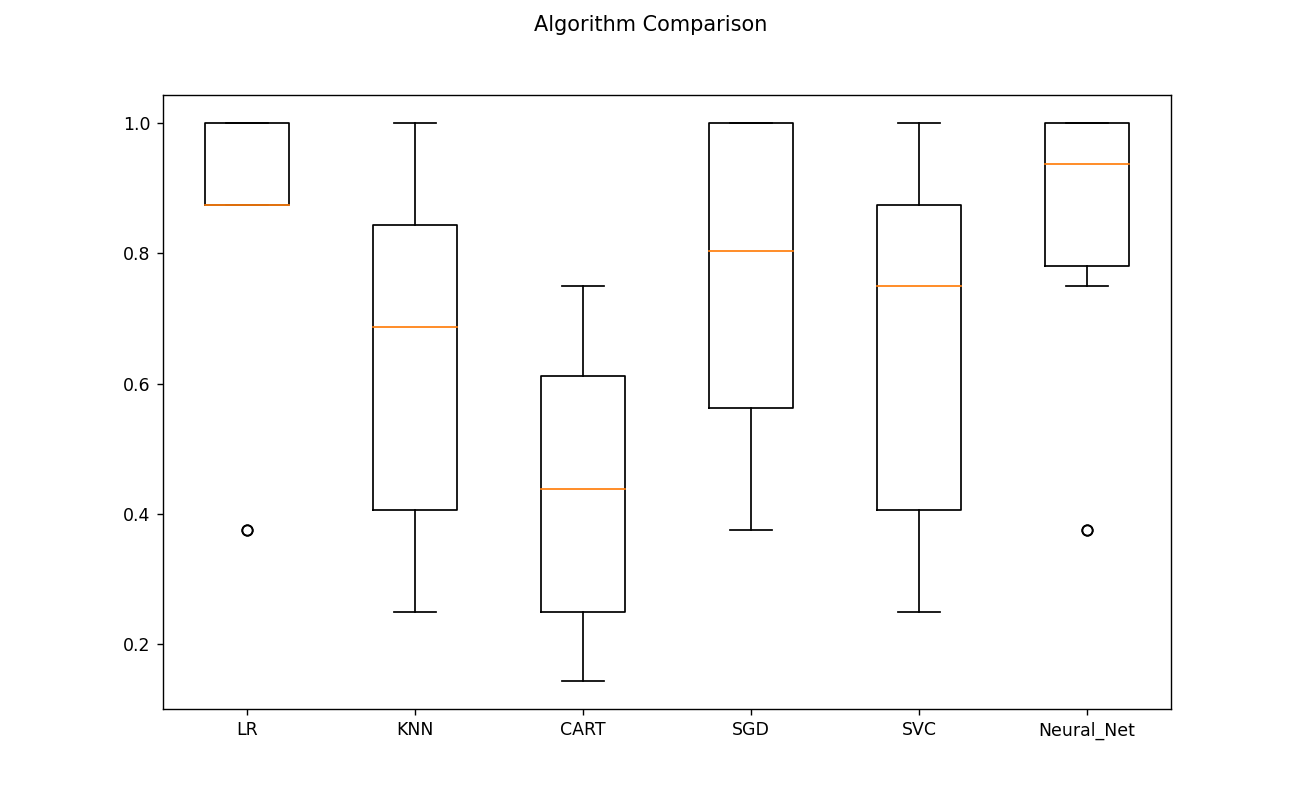

In [58]:
### Comparing different performances of models in scikit learn
# prepare models
%matplotlib notebook

#neural_net = KerasRegressor(build_fn=create_model, epochs=150, batch_size=128, verbose=0)#### this is where we take the create_model 
seed=7
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN',  KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SGD', SGDClassifier()))
models.append(('SVC', SVC(gamma='auto')))
models.append(('Neural_Net',MLPClassifier()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train,  y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    #print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [59]:
### Bagged Decision Trees for Classification
seed=7
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

#Ytr = y_train_res.to_numpy()
#Xtr = x_train_res.reset_index(drop=True).to_numpy()

kfold = model_selection.KFold(n_splits=3, random_state=seed)
cart = DecisionTreeClassifier()
num_trees = 1000
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
scoring = 'accuracy'
results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
print(results.mean())

/opt/conda/envs/DLM_R2Py/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



0.1923076923076923


In [60]:
# Random Forest Classification
import pandas
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier



num_trees = 100
max_features = 'auto'
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
scoring = 'accuracy'
results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
print(results.mean())

/opt/conda/envs/DLM_R2Py/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



0.5625


In [61]:
# Extra Trees Classification
import pandas
from sklearn import model_selection
from sklearn.ensemble import ExtraTreesClassifier



num_trees = 100
max_features = 4
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)
scoring = 'accuracy'
results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
print(results.mean())

/opt/conda/envs/DLM_R2Py/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



0.625


In [62]:
# AdaBoost Classification
import pandas
from sklearn import model_selection
from sklearn.ensemble import AdaBoostClassifier



num_trees = 50
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
scoring = 'accuracy'
results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
print(results.mean())

/opt/conda/envs/DLM_R2Py/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



0.3445


In [63]:
# Stochastic Gradient Boosting Classification
import pandas
from sklearn import model_selection
from sklearn.ensemble import GradientBoostingClassifier





num_trees = 100
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)
scoring = 'accuracy'
results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
print(results.mean())

/opt/conda/envs/DLM_R2Py/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.



1.0


### Ensemble classifier

In [66]:
### Voting Ensemble for Classification
import pandas

from sklearn import model_selection


from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier
#reload(sklearn.neighbors)
from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC

from sklearn.ensemble import VotingClassifier

#from keras.wrappers.scikit_learn import KerasRegressor
#neural_net = KerasRegressor(build_fn=create_model, epochs=150, batch_size=128, verbose=0)#### this is where we take the create_model 
# create the sub models
models = []
models.append(('LR', LogisticRegression()))
models.append(('DCT',  DecisionTreeClassifier()))
models.append(('KNN',  KNeighborsClassifier()))
models.append(('SVC', SVC(gamma='auto')))




kfold = model_selection.KFold(n_splits=10, random_state=seed)


# create the ensemble model
ensemble = VotingClassifier(models)
scoring = 'accuracy'
results = model_selection.cross_val_score(ensemble,  X_train, y_train, cv=kfold, scoring=scoring)
print(results.mean())

/opt/conda/envs/DLM_R2Py/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.

/opt/conda/envs/DLM_R2Py/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/opt/conda/envs/DLM_R2Py/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (ma

0.675


/opt/conda/envs/DLM_R2Py/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/opt/conda/envs/DLM_R2Py/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/opt/conda/envs/DLM_R2

In [67]:
results

array([0.25 , 0.875, 0.625, 0.75 , 0.625, 0.25 , 1.   , 0.375, 1.   ,
       1.   ])

In [69]:
####Stacking Ensemble for Classification
#######Vecstack
from xgboost import XGBClassifier
from vecstack import stacking

from sklearn import model_selection
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
#from keras.wrappers.scikit_learn import KerasRegressor
#neural_net = KerasRegressor(build_fn=create_model, epochs=150, batch_size=128, verbose=0)#### this is where we take the create_model 



#from keras.wrappers.scikit_learn import KerasRegressor

models = []
models.append(ExtraTreesClassifier(random_state=0, n_jobs=-1, 
                        n_estimators=100, max_depth=3))
        
models.append(RandomForestClassifier(random_state=0, n_jobs=-1, 
                          n_estimators=100, max_depth=3))
        
models.append(XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1, 
                 n_estimators=100, max_depth=3))
    

    
models.append(KNeighborsClassifier())

models.append( SVC(gamma='auto'))

 

S_train, S_test = stacking(models,                     # list of models
                           X_train, 
                           y_train_encod, 
                           X_val,                      # data
                           regression=False,            # regression task (if you need 
                                                       #     classification - set to False)
                           mode='oof_pred_bag',        # mode: oof for train set, predict test 
                                                       #     set in each fold and find mean
                           save_dir=None,              # do not save result and log (to save 
                                                       #     in current dir - set to '.')
                           metric=accuracy_score, # metric: callable
                           n_folds=10,                 # number of folds
                           shuffle=True,               # shuffle the data
                           random_state=seed,          # ensure reproducibility
                           verbose=2)                  # print all info    
    
    


task:         [classification]
n_classes:    [8]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [5]

model  0:     [ExtraTreesClassifier]
    fold  0:  [0.62500000]
    fold  1:  [0.62500000]
    fold  2:  [0.75000000]
    fold  3:  [0.75000000]
    fold  4:  [0.87500000]
    fold  5:  [0.62500000]
    fold  6:  [0.87500000]
    fold  7:  [0.87500000]
    fold  8:  [0.42857143]
    fold  9:  [0.71428571]
    ----
    MEAN:     [0.71428571] + [0.13623022]
    FULL:     [0.71794872]

model  1:     [RandomForestClassifier]
    fold  0:  [0.75000000]
    fold  1:  [0.62500000]
    fold  2:  [0.62500000]
    fold  3:  [0.75000000]
    fold  4:  [0.87500000]
    fold  5:  [0.62500000]
    fold  6:  [0.75000000]
    fold  7:  [0.62500000]
    fold  8:  [0.42857143]
    fold  9:  [0.57142857]
    ----
    MEAN:     [0.66250000] + [0.11694725]
    FULL:     [0.66666667]

model  2:     [XGBClassifier]
    fold  0:  [0.62500000]
    fold  1:  [0.62500000]
    fold  2:  

In [71]:
import sklearn
from sklearn.linear_model import ElasticNet
# Initialize 2nd level model
#model = ElasticNet()
model = RandomForestClassifier(random_state=0, n_jobs=-1,
                      n_estimators=100, max_depth=3)    
# Fit 2nd level model
model = model.fit(S_train, y_train_encod)

# Predict
y_pred = model.predict(S_test)

# Final prediction score
print('Final prediction score: [%.8f]' % sklearn.metrics.accuracy_score(y_val_encod, y_pred))

Final prediction score: [0.72222222]


In [72]:
####Stacking Ensemble for Classification
####mlens
from mlens.ensemble import SuperLearner
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC

# --- Build ---
scoring = accuracy_score
# Passing a scoring function will create cv scores during fitting
# the scorer should be a simple function accepting to vectors and returning a scalar
ensemble = SuperLearner(scorer=scoring, random_state=seed, verbose=2)

# Build the first layer

ensemble.add([
           ExtraTreesClassifier(random_state=0, n_jobs=-1, 
                        n_estimators=100, max_depth=3),
        
           RandomForestClassifier(random_state=0, n_jobs=-1, 
                          n_estimators=100, max_depth=3),
        
           XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1, 
                      n_estimators=100, max_depth=3) ,
    
           LogisticRegression(),
    
           #ElasticNet(),
    
           KNeighborsClassifier(),

           SVC(gamma='auto')
             ])

# Attach the final meta estimator
ensemble.add_meta( XGBClassifier())

# --- Use ---

# Fit ensemble
ensemble.fit(X, y_train_res_encod)

# Predict
preds = ensemble.predict(X_val.to_numpy())


Fitting 2 layers


[MLENS] backend: threading


Processing layer-1             

/opt/conda/envs/DLM_R2Py/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/opt/conda/envs/DLM_R2Py/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/opt/conda/envs/DLM_R2

done | 00:00:04
Processing layer-2             done | 00:00:00
Fit complete                        | 00:00:04

Predicting 2 layers
Processing layer-1             

/opt/conda/envs/DLM_R2Py/lib/python3.7/site-packages/mlens/parallel/_base_functions.py:313: ParameterChangeWarning:

Parameter value ('multi:softprob') has changed since model was fitted ('binary:logistic').

/opt/conda/envs/DLM_R2Py/lib/python3.7/site-packages/mlens/parallel/_base_functions.py:313: ParameterChangeWarning:

Parameter value ('multi:softprob') has changed since model was fitted ('binary:logistic').

/opt/conda/envs/DLM_R2Py/lib/python3.7/site-packages/mlens/parallel/_base_functions.py:313: ParameterChangeWarning:

Parameter value ('multi:softprob') has changed since model was fitted ('binary:logistic').



done | 00:00:00
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:00


In [73]:
print("Fit data:\n%r" % ensemble.data)

Fit data:
                                   score-m  score-s  ft-m  ft-s  pt-m  pt-s
layer-1  extratreesclassifier         0.98     0.01  1.59  0.17  0.41  0.11
layer-1  kneighborsclassifier         1.00     0.00  0.13  0.07  0.57  0.10
layer-1  logisticregression           1.00     0.00  2.49  0.00  0.00  0.00
layer-1  randomforestclassifier       0.97     0.02  1.69  0.04  0.31  0.02
layer-1  svc                          1.00     0.00  0.16  0.05  0.08  0.01
layer-1  xgbclassifier                1.00     0.00  2.82  0.09  0.02  0.00



In [74]:
print("Prediction score: %.3f" % accuracy_score(preds, y_val_encod))

Prediction score: 0.722


## Deep Neuronal Networks

### Keras approach 

In [128]:
input_shape=metharr.beta.shape[1];input_shape

108

#### Binary Crossentropy loss 

In [129]:
from tensorflow import keras
from keras import Input, Model, layers
from keras import optimizers 
def NNet_sig(input_shape):  
    
    inputs=Input((input_shape,))
    x = layers.Dense(128)(inputs)#
    x = layers.Activation('relu')(x)#
    x = layers.BatchNormalization()(x)
    
    #x = layers.Dropout(0.04)(x)    
    #x = layers.Dense(100, kernel_initializer='he_normal')(x)
    #x = layers.Activation('relu')(x)
    #x = layers.BatchNormalization()(x)
        
    #x = layers.Dropout(0.04)(x)#
    #x = layers.Dense(50, kernel_initializer='he_normal')(x)#
    #x = layers.Activation('relu')(x)#
    #x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.5)(x)#
    x = layers.Dense(64, kernel_initializer='he_normal')(x)#
    x = layers.Activation('relu')(x)#
    x = layers.BatchNormalization()(x)
   
    
        
    x = layers.Dropout(0.5)(x)#
    x = layers.Dense(64, kernel_initializer='he_normal')(x)#
    x = layers.Activation('relu')(x)#
    x = layers.BatchNormalization()(x)
           
    #x = layers.Dense(25, kernel_initializer='he_normal')(x)#2
    #x = layers.Activation('relu')(x)
    #x = layers.BatchNormalization()(x)#
   # x = layers.Dropout(0.1)(x)
    #x = layers.Dropout(0.1)(x)#
    #x = layers.Dense(16, kernel_initializer='he_normal')(x)#
    #x = layers.Activation('relu')(x)#
    #x = layers.BatchNormalization()(x)#
    
    #x = layers.Dropout(0.1)(x)#
    x = layers.Dense(8, kernel_initializer='he_normal')(x)
    x = layers.Activation('sigmoid')(x)
        
    

    model = Model(inputs=inputs, outputs=x)

   
    opt = optimizers.Adam(lr=1e-4)    
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['binary_crossentropy', 'accuracy'])

    return model

In [130]:
input_shape

108

In [131]:
model = NNet_sig(input_shape)

In [132]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 108)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 128)               13952     
_________________________________________________________________
activation_21 (Activation)   (None, 128)               0         
_________________________________________________________________
batch_normalization_16 (Batc (None, 128)               512       
_________________________________________________________________
dropout_11 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 64)                8256      
_________________________________________________________________
activation_22 (Activation)   (None, 64)                0         
__________

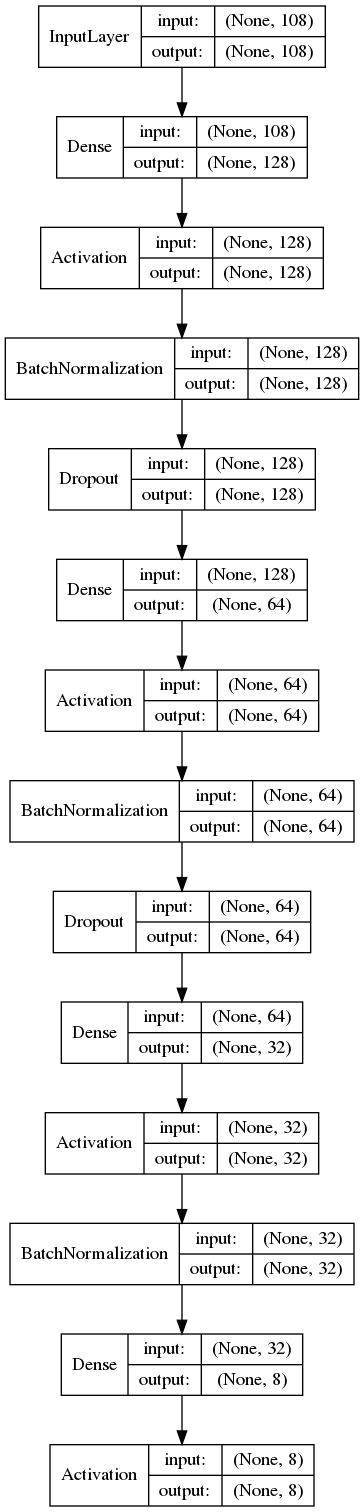

In [130]:
from keras.utils import plot_model
from PIL import Image
%matplotlib notebook
plot_model(model, show_shapes=True,show_layer_names=False, to_file='model.png')
Image.open('model.png')

In [133]:
batch_size=64

In [134]:
lr_finder = LRFinder(model)
#lr_finder = LRFinder(ae)
# Train a model with batch size 512 for 5 epochs
# with learning rate growing exponentially from 0.0001 to 1
lr_finder.find(X_train_res, y_train_res_oneencod, 1e-9, 100, batch_size=batch_size, epochs=5)

Epoch 1/5
2000/2000 [==============================] - 1s 598us/step - loss: 0.9149 - binary_crossentropy: 0.9149 - acc: 0.4919
Epoch 2/5
2000/2000 [==============================] - 0s 78us/step - loss: 0.9254 - binary_crossentropy: 0.9254 - acc: 0.4873
Epoch 3/5
2000/2000 [==============================] - 0s 77us/step - loss: 0.8462 - binary_crossentropy: 0.8462 - acc: 0.5266
Epoch 4/5
1408/2000 [====================>.........] - ETA: 0s - loss: 0.3310 - binary_crossentropy: 0.3310 - acc: 0.8503

<IPython.core.display.Javascript object>


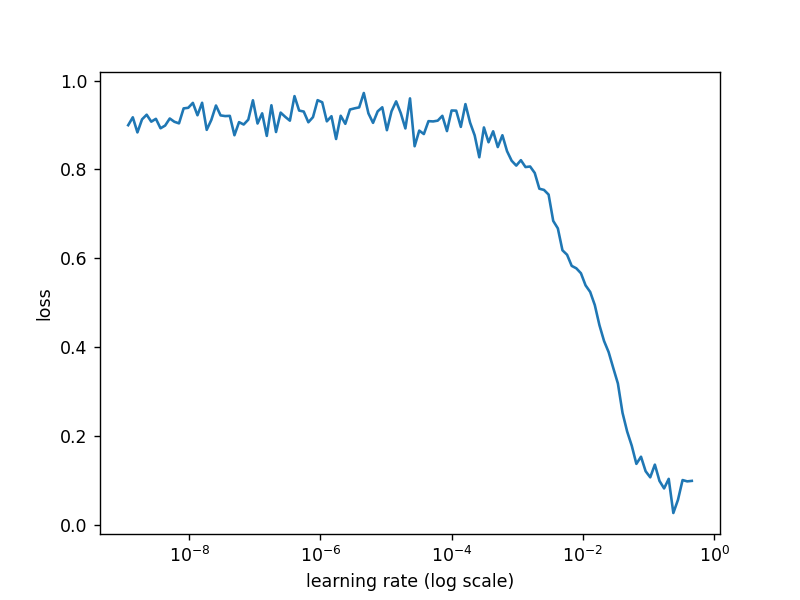

In [135]:
%matplotlib notebook
lr_finder.plot_loss(n_skip_beginning=1, n_skip_end=1)

In [136]:
lr_reducer = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                               patience=5, verbose=1, mode='auto',
                               min_delta=10, cooldown=7,
                               min_lr=0.0001)
checkpoint = keras.callbacks.ModelCheckpoint('best_model_weights.hdf5',
                             monitor='val_loss',
                             save_best_only=True)
clr = CyclicLR(base_lr=6e-3, max_lr=3e-2,
                        step_size=int(np.ceil(len(X_train_res)/4)))
earlystopping = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=55, verbose=1, mode='auto', restore_best_weights=True)



callbacks_list = [ clr,earlystopping ]




In [137]:
history = model.fit(x=X_train_res, y=y_train_res_oneencod, batch_size=batch_size, epochs=60,
                    verbose=1, callbacks=callbacks_list,
                    validation_data=(X_val_res, y_val_res_oneencod),
                    shuffle=True
                    )

Train on 2000 samples, validate on 1000 samples
Epoch 1/60
2000/2000 [==============================] - 0s 146us/step - loss: 0.5701 - binary_crossentropy: 0.5701 - acc: 0.7158 - val_loss: 0.3212 - val_binary_crossentropy: 0.3212 - val_acc: 0.9050
Epoch 2/60
2000/2000 [==============================] - 0s 81us/step - loss: 0.1435 - binary_crossentropy: 0.1435 - acc: 0.9698 - val_loss: 0.0899 - val_binary_crossentropy: 0.0899 - val_acc: 0.9604
Epoch 3/60
2000/2000 [==============================] - 0s 81us/step - loss: 0.0447 - binary_crossentropy: 0.0447 - acc: 0.9898 - val_loss: 0.0845 - val_binary_crossentropy: 0.0845 - val_acc: 0.9484
Epoch 4/60
2000/2000 [==============================] - 0s 82us/step - loss: 0.0235 - binary_crossentropy: 0.0235 - acc: 0.9954 - val_loss: 0.0611 - val_binary_crossentropy: 0.0611 - val_acc: 0.9690
Epoch 5/60
2000/2000 [==============================] - 0s 83us/step - loss: 0.0140 - binary_crossentropy: 0.0140 - acc: 0.9972 - val_loss: 0.0363 - val_bi

In [138]:
history.history.keys()

dict_keys(['val_loss', 'val_binary_crossentropy', 'val_acc', 'loss', 'binary_crossentropy', 'acc'])

<IPython.core.display.Javascript object>


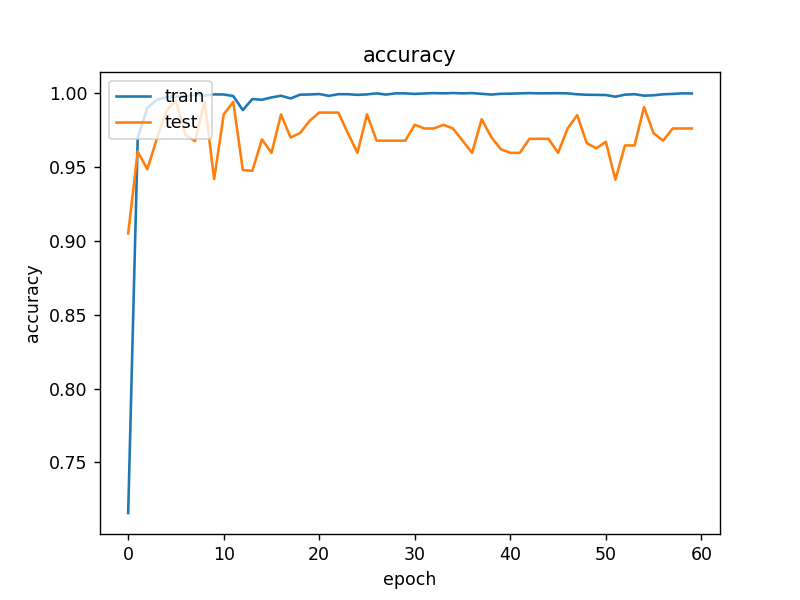

In [139]:
from sklearn.metrics import mean_absolute_error
%matplotlib notebook
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<IPython.core.display.Javascript object>


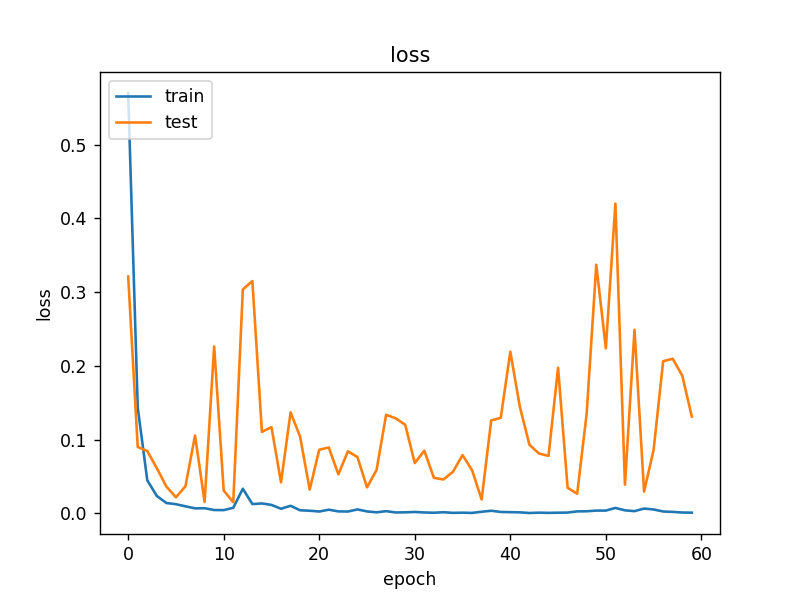

In [140]:
from sklearn.metrics import mean_absolute_error
%matplotlib notebook
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [141]:
predictions=model.predict(X_val)

In [143]:
np.argmax(predictions, axis=-1)[:-1]

array([0, 0, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 3, 2, 4, 5, 5, 5, 6, 5, 5, 5,
       7, 7, 7])

In [145]:
le.inverse_transform(np.argmax(predictions[-1:], axis=-1))

array(['TLE/CTRL'], dtype=object)

In [146]:
le.inverse_transform(np.argmax(predictions, axis=-1))

array(['Control - NCx', 'Control - NCx', 'Control - WM', 'Control - WM',
       'FCD 2A', 'FCD 2A', 'FCD 2A', 'FCD 2A', 'FCD 2B', 'FCD 2B',
       'FCD 2B', 'FCD 2B', 'FCD 2B', 'FCD 2A', 'HME', 'PMG', 'PMG', 'PMG',
       'PMG_1q', 'PMG', 'PMG', 'PMG', 'TLE/CTRL', 'TLE/CTRL', 'TLE/CTRL',
       'TLE/CTRL'], dtype=object)

In [147]:
model.evaluate(X_val, y_val_oneencod)

26/26 [==============================] - 0s 71us/step


[0.08873651921749115, 0.08873651921749115, 0.9807692170143127]

In [148]:
correct = np.where(np.argmax(predictions, axis=-1)[:-1]==le.transform(y_val[:-1]))[0]
print(len(correct)/len(le.transform(y_val[:-2])))

0.9583333333333334


In [149]:
from sklearn.metrics import auc,roc_auc_score, roc_curve
roc_auc_score(y_val_oneencod,predictions, multi_class='ovr')

0.9985795454545454

In [150]:
n_classes=y_val_oneencod.shape[1]

In [151]:
y_val_oneencod.shape[1]

8

In [152]:

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val_oneencod[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_val_oneencod.ravel(), predictions.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [153]:
fpr[2]

array([0.        , 0.        , 0.        , 0.04545455, 0.04545455,
       0.31818182, 0.40909091, 0.54545455, 1.        ])

<IPython.core.display.Javascript object>


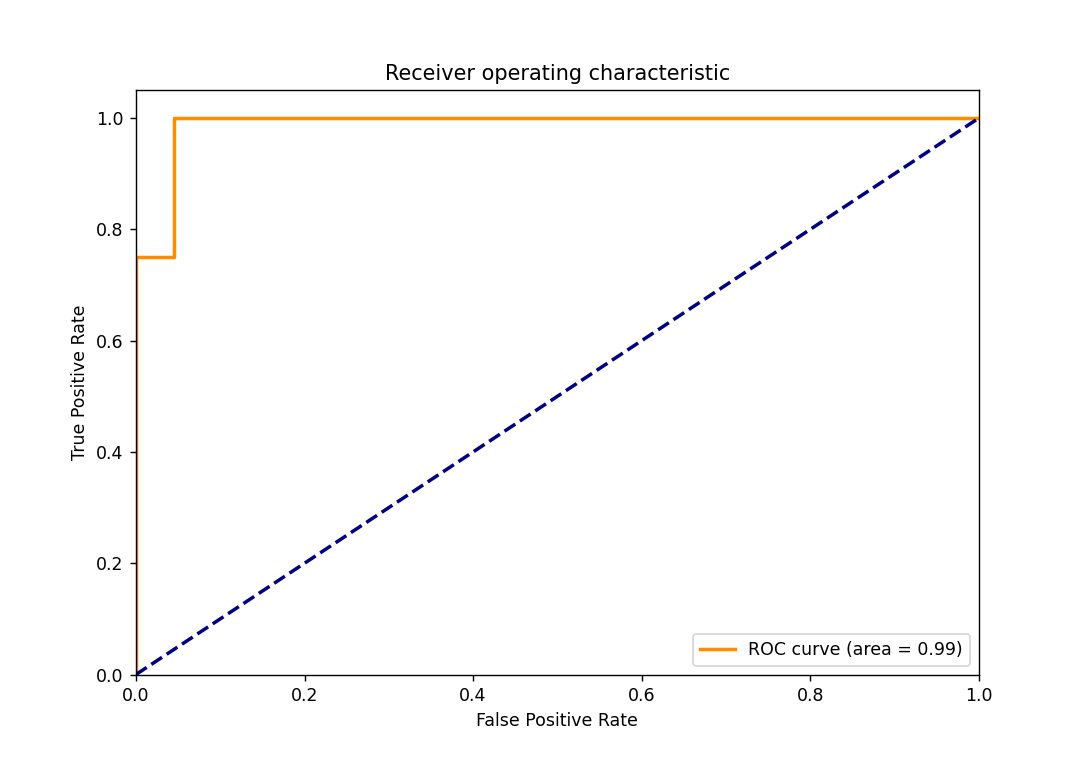

In [154]:
%matplotlib notebook
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## Cross- Validation of Neuronal nets 

In [155]:
from time import time
from keras.applications.nasnet import NASNetMobile, NASNetLarge, preprocess_input
from keras.callbacks import ReduceLROnPlateau, TensorBoard, EarlyStopping, ModelCheckpoint, Callback, LambdaCallback
from keras.layers import Convolution1D, concatenate, SpatialDropout1D, GlobalMaxPool1D, GlobalAvgPool1D, Embedding, \
    Conv2D, SeparableConv1D, Add, BatchNormalization, Activation, GlobalAveragePooling2D, LeakyReLU, Flatten
from keras.layers import Dense, Input, Dropout, MaxPooling2D, Concatenate, GlobalMaxPooling2D, GlobalAveragePooling2D, \
    Lambda, Multiply, LSTM, Bidirectional, PReLU, MaxPooling1D
from keras.losses import mae, sparse_categorical_crossentropy, binary_crossentropy
from keras.models import Model
from keras.optimizers import Adam, RMSprop
from tensorflow import keras
from keras import Input, Model, layers
from keras import optimizers 


def get_callbacks(name_weights, array, max_lr=1e-3, base_lr=1e-6):
    ReduceLR = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1, mode='auto', cooldown=5, min_lr=0.00005)
    
    lr_reducer = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                               patience=5, verbose=1, mode='auto',
                               min_delta=10, cooldown=7,
                               min_lr=0.0001)
    earlystopping = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=10, verbose=1, mode='auto', restore_best_weights=True)
    #tensorboard_callback = TensorBoard(log_dir="logs_NasnetM/{}".format(time()), 
    #        histogram_freq=0, 
    #        write_graph=True, write_grads=False, write_images=True)
    checkpoint = ModelCheckpoint(name_weights, 
                                 monitor='val_loss', 
                                 verbose=1, 
                                 save_best_only=True, 
                                 save_weights_only=True, 
                                 mode='auto')    
    
    clr = CyclicLR(base_lr=base_lr, max_lr=max_lr,
                            step_size=int(np.ceil(len(array)/4)))
  
    
    
    
    
    return [earlystopping, ReduceLR, checkpoint, clr]


def NNet_sig(input_shape):  
    
    inputs=Input((input_shape,))
    x = layers.Dense(128)(inputs)#
    x = layers.Activation('relu')(x)#
    x = layers.BatchNormalization()(x)
    
    #x = layers.Dropout(0.04)(x)    
    #x = layers.Dense(100, kernel_initializer='he_normal')(x)
    #x = layers.Activation('relu')(x)
    #x = layers.BatchNormalization()(x)
        
    #x = layers.Dropout(0.04)(x)#
    #x = layers.Dense(50, kernel_initializer='he_normal')(x)#
    #x = layers.Activation('relu')(x)#
    #x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.3)(x)#
    x = layers.Dense(64, kernel_initializer='he_normal')(x)#
    x = layers.Activation('relu')(x)#
    x = layers.BatchNormalization()(x)
   
    
        
    x = layers.Dropout(0.3)(x)#
    x = layers.Dense(32, kernel_initializer='he_normal')(x)#
    x = layers.Activation('relu')(x)#
    x = layers.BatchNormalization()(x)
           
    #x = layers.Dense(25, kernel_initializer='he_normal')(x)#2
    #x = layers.Activation('relu')(x)
    #x = layers.BatchNormalization()(x)#
   # x = layers.Dropout(0.1)(x)
    #x = layers.Dropout(0.1)(x)#
    #x = layers.Dense(16, kernel_initializer='he_normal')(x)#
    #x = layers.Activation('relu')(x)#
    #x = layers.BatchNormalization()(x)#
    
    #x = layers.Dropout(0.1)(x)#
    x = layers.Dense(8, kernel_initializer='he_normal')(x)
    x = layers.Activation('sigmoid')(x)
        
    

    model = Model(inputs=inputs, outputs=x)

   
    opt = optimizers.Adam(lr=1e-4)    
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['binary_crossentropy', 'accuracy'])

    return model


In [156]:
train_beta_list=[]
train_pheno_list=[]
valid_beta_list=[]
valid_pheno_list=[]

In [157]:
#initialize StratifiedKFold
from sklearn.model_selection import StratifiedKFold, KFold
kfold_splits=7
skf = StratifiedKFold(n_splits=kfold_splits, shuffle=True, random_state=101)
kf=KFold(n_splits=kfold_splits, shuffle=False, random_state=None)

In [158]:
group='disease_diagnosis'
kf.get_n_splits(metharr.beta, metharr.pheno[group])

7

In [160]:
model_list=[]

In [161]:
for index, (train_indices, val_indices) in enumerate(skf.split(metharr.beta, metharr.pheno[group])):
    print(index)
    # Generate batches from indices
    train_betas, train_phenos, valid_betas, valid_phenos = metharr.beta.iloc[train_indices], metharr.pheno[group].iloc[train_indices],metharr.beta.iloc[val_indices], metharr.pheno[group].iloc[val_indices]
    sm = SMOTE(random_state=12, k_neighbors = 2)
    train_betas, train_phenos = sm.fit_sample(train_betas, train_phenos)
    from sklearn.utils import resample
    train_betas, train_phenos=resample(train_betas, train_phenos, n_samples=2000, replace=True, stratify=train_phenos, random_state=123)

    
    
    from imblearn.over_sampling import RandomOverSampler
    ros = RandomOverSampler(random_state=42)
    valid_betas, valid_phenos = ros.fit_resample(valid_betas, valid_phenos)
    
    
    #sm = SMOTE(random_state=12, k_neighbors = 2)
    #X_train_res, y_train_res = sm.fit_sample(X_train, y_train)
    #from sklearn.utils import resample
    #X_train_res, y_train_res=resample(X_train_res, y_train_res, n_samples=2000, replace=True, stratify=y_train_res, random_state=123)

    
    #X_val_res, y_val_res = ros.fit_resample(X_val, y_val)
    #from sklearn.utils import resample
    #X_val_res, y_val_res=resample(X_val_res, y_val_res, n_samples=100, replace=True, stratify=y_val_res, random_state=123)
    
    
    
    
    train_phenos=LabelEncoder().fit_transform(train_phenos)
    valid_phenos=LabelEncoder().fit_transform(valid_phenos)
    
    train_phenos=to_categorical(train_phenos)
    valid_phenos=to_categorical(valid_phenos)
    
    train_beta_list.append(train_betas)
    train_pheno_list.append(train_phenos)
    
    valid_beta_list.append(valid_betas)
    valid_pheno_list.append(valid_phenos)


/opt/conda/envs/DLM_R2Py/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning:

The least populated class in y has only 6 members, which is less than n_splits=7.



0
1
2
3
4
5
6


In [162]:
valid_phenos[0]

array([1., 0., 0., 0., 0., 0.], dtype=float32)

In [163]:
model_path='./model/'
batch_size=32

In [164]:
index=0
for trains_betas, trains_phenos, valids_betas,valids_phenos in zip(train_beta_list,train_pheno_list,valid_beta_list,valid_pheno_list):
    print('\n')
    print ("Training on fold " + str(index+1) + "\n...")
    # Generate batches from indices
    
   
    name_weights = "model_fold_{0}.weights.best.hdf5".format(index+1)
    callbacks_list = get_callbacks(name_weights,trains_betas, max_lr=1e-2, base_lr=1e-6)
    input_shape=trains_betas.shape[1]
    #print(input_shape)
    #print(valids_betas.shape[1])
    #print(trains_phenos.shape[1])
    #print(valids_phenos.shape[1])
    model = NNet_sig(input_shape)
    
    print('\n')
    print('Training model of fold {0} \n...'.format(index+1))
    
    history = model.fit(x=trains_betas.to_numpy(), 
                        y=trains_phenos, 
                        batch_size=batch_size, 
                        epochs=1200,
                        verbose=1, 
                        callbacks=callbacks_list,
                        validation_data=(valids_betas, valids_phenos),
                        shuffle=True
                        )
    
    
    model_list.append(history)
    model.save_weights(model_path+'model_fold_{0}.hdf5'.format(index+1))
    index+=1
print('\n...finished')



Training on fold 1
...


Training model of fold 1 
...
Train on 2000 samples, validate on 24 samples
Epoch 1/1200
2000/2000 [==============================] - 1s 506us/step - loss: 0.7911 - binary_crossentropy: 0.7911 - acc: 0.5677 - val_loss: 0.5519 - val_binary_crossentropy: 0.5519 - val_acc: 0.6927

Epoch 00001: val_loss improved from inf to 0.55190, saving model to model_fold_1.weights.best.hdf5
Epoch 2/1200
2000/2000 [==============================] - 0s 148us/step - loss: 0.4374 - binary_crossentropy: 0.4374 - acc: 0.8079 - val_loss: 0.3168 - val_binary_crossentropy: 0.3168 - val_acc: 0.9271

Epoch 00002: val_loss improved from 0.55190 to 0.31684, saving model to model_fold_1.weights.best.hdf5
Epoch 3/1200
2000/2000 [==============================] - 0s 143us/step - loss: 0.2071 - binary_crossentropy: 0.2071 - acc: 0.9660 - val_loss: 0.1221 - val_binary_crossentropy: 0.1221 - val_acc: 0.9740

Epoch 00003: val_loss improved from 0.31684 to 0.12213, saving model to model_fold_1.w

ValueError: Error when checking target: expected activation_52 to have shape (8,) but got array with shape (6,)

In [165]:
for index in range(len(model_list)):
    idx=np.argmax(np.array(model_list[index].history['val_acc']))
    #print(idx)
    print(np.array(model_list[index].history['val_acc'])[idx])

1.0
1.0
0.984375
1.0
1.0
1.0


In [166]:
index=0
idx=np.argmax(np.array(model_list[index].history['acc']));idx

20

In [167]:
np.array(model_list[index].history['acc'])[idx]

1.0

<IPython.core.display.Javascript object>


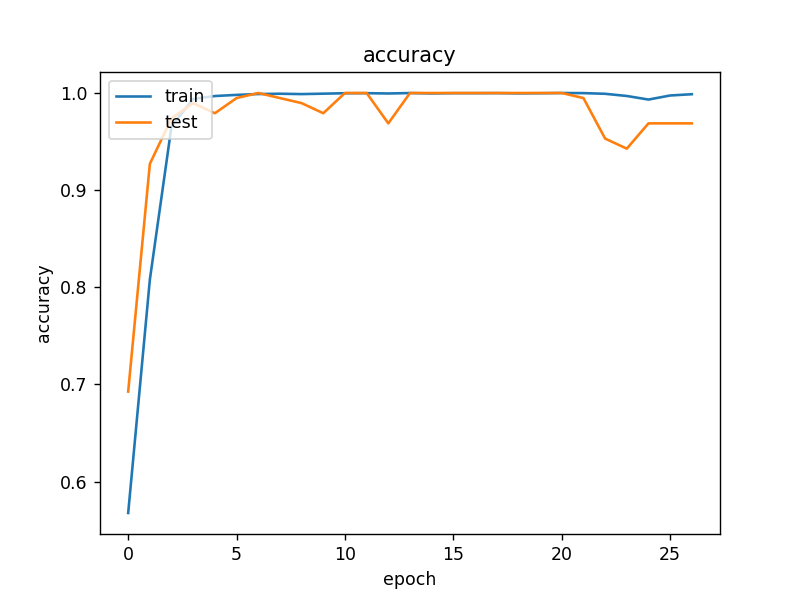

In [168]:
from sklearn.metrics import mean_absolute_error
%matplotlib notebook
plt.plot(model_list[index].history['acc'])
plt.plot(model_list[index].history['val_acc'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<IPython.core.display.Javascript object>


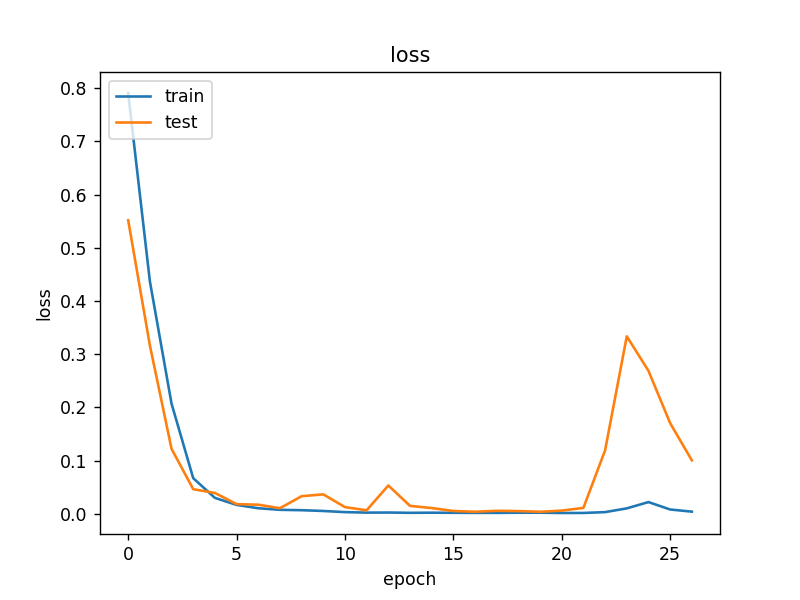

In [169]:
from sklearn.metrics import mean_absolute_error
%matplotlib notebook
plt.plot(model_list[index].history['loss'])
plt.plot(model_list[index].history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Statistics plots

In [201]:
neural_net_df=pd.read_csv('statistics_6fold.csv')

In [202]:
neural_net_df#.transpose()

,Values,Classifier,Fold
0,1.000000,Classifier_92cpgs_98samples,Fold1
1,1.000000,Classifier_92cpgs_98samples,Fold2
2,1.000000,Classifier_92cpgs_98samples,Fold3
3,1.000000,Classifier_92cpgs_98samples,Fold4
4,0.992188,Classifier_92cpgs_98samples,Fold5
5,1.000000,Classifier_92cpgs_98samples,Fold6


In [203]:
neural_net_df.transpose().to_numpy()[0]

array([1.0, 1.0, 1.0, 1.0, 0.9921875, 1.0], dtype=object)

In [204]:
#neural_net_df=neural_net_df.transpose().reset_index(drop=True)

In [205]:
neural_net_df['Fold']#

0    Fold1
1    Fold2
2    Fold3
3    Fold4
4    Fold5
5    Fold6
Name: Fold, dtype: object

<IPython.core.display.Javascript object>


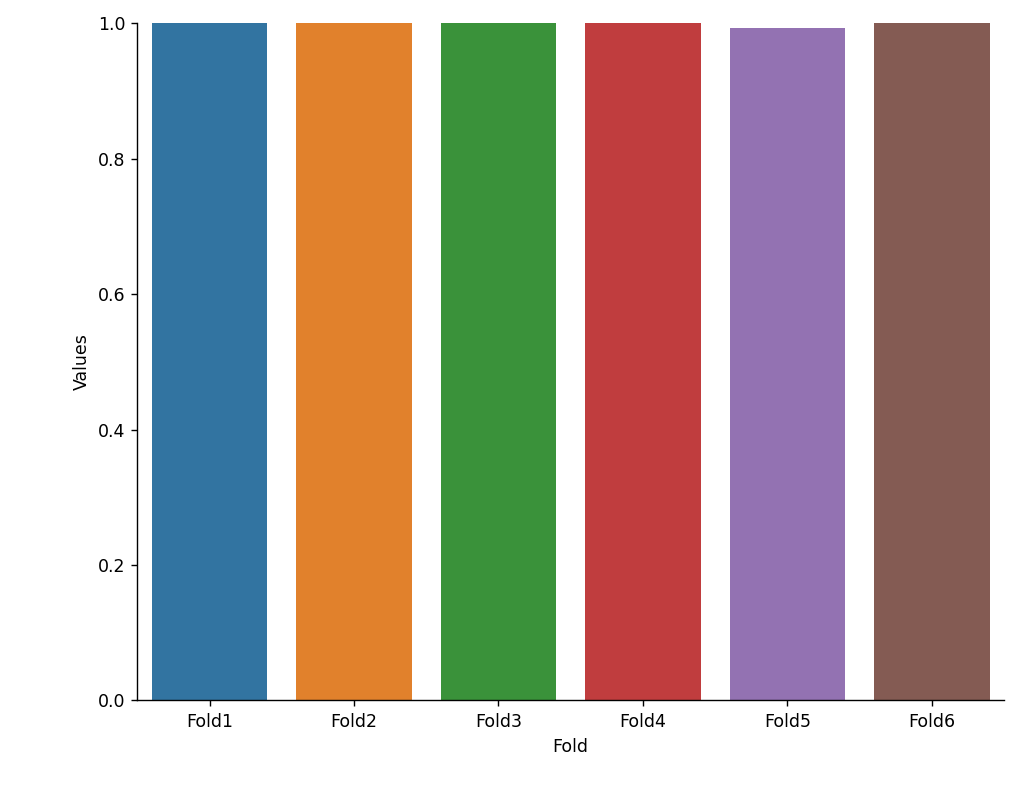

In [206]:
%matplotlib notebook
#sns.boxplot(neural_net_df)

p1=sns.catplot(kind='bar', x='Fold', y='Values', data=neural_net_df)
p1.set(ylim=(0, 1))

#p1=sns.lmplot(data=neural_net_df, x=neural_net_df['Fold'],  y=neural_net_df['Values'], fit_reg=False, x_estimator=np.mean, palette= 'Set2')